In [18]:
import csv
import sys
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

#from scipy import stats, integrate
#from scipy import misc
import scipy.ndimage as ndi
from scipy.spatial import distance
from itertools import cycle


from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib._png import read_png
from matplotlib.cbook import get_sample_data
from matplotlib.lines import Line2D

global Fixations_person

%matplotlib inline

np.set_printoptions(threshold='nan')

#sns.set(color_codes=True)

plt.close('all')

width = 20
height = 20
time= '10'


# 21 images
# imageName_array =['OverParis', 'outdoor8', 'BellagioHotelLobby', 'theBeach', 'indoor3', 'outdoor2', 'indoor4', 'outdoor18', 'The_Porch', 'outdoor16', 'indoor5', 'outdoor6', 'outdoor17', 'CathedraledeBordeaux', 'outdoor5', 'outdoor4', 'indoor7', 'outdoor9', 'outdoor1', 'indoor6', 'outdoor15']
# imageLabels = ['Paris', 'Desert', 'Lobby', 'Beach', 'Office', 'Bay', 'Wed', 'Snow', 'Porch', 'Pool', 'Talk', 'Hike', 'Game', 'Church', 'Cows', 'Kayak', 'Gallery', 'Ski', 'Fair', 'Show', 'Concert']

# 16 participants
#persons_array=["1", "2", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "15", "16", "17", "18"] # 20s 
#persons_array=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"] # 10s

imageName_array =['Desert']
persons_array=["2"] 


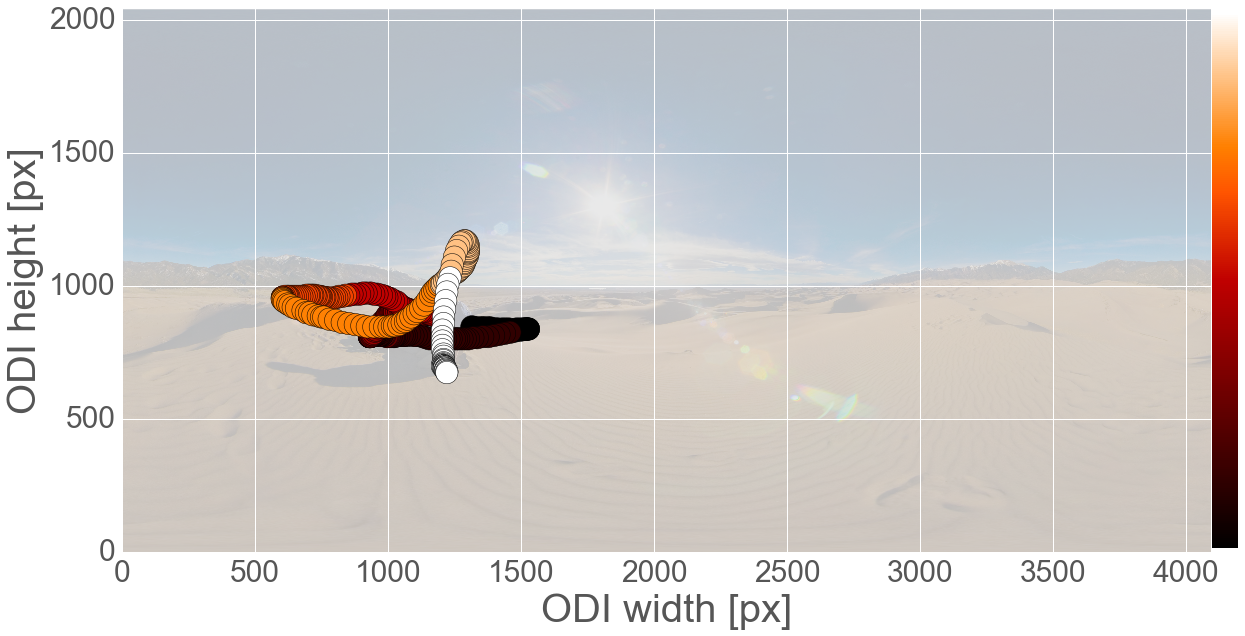

In [21]:
for image_index in range(len(imageName_array)):

    imageName = imageName_array[image_index]

    
    for person_idx in range(len(persons_array)) :
        person = persons_array[person_idx]
        
        array_x=[]
        array_y=[]
        array_time=[]

        array_x_org=[]
        array_y_org=[]
        count_row=0
        
        RegisteredPoints_person= np.zeros((501, 1001), dtype=object) # Created to have a heat map per person
        ProbMatrix_person= np.zeros((501, 1001), dtype=np.int) # Created to have a heat map per person

        
        #***********************************************************************
        # Read the csv file and store in arrays (x,y) values
        #***********************************************************************

        #f = open('stats_' + person + '.csv', 'rt')
        
        f = open(('QoMEX_usedStatsFiles/statsSecond1_showingTime_' + time + '000_participant_' + person + '.csv'), 'rt')
        
        try:
            reader = csv.reader(f)
            
            
            for row in reader:
                
                if row != []:
     
                    if row[1] == imageName:
                        count_row += 1
                        #print count_row
                        if count_row == 1:
                            firstTime = np.around(float(row[2]))
                        if count_row > 40: # to don't consider the first fixation (1s)
                        # if count_row > 40 and count_row < 600: # to don't consider the first fixation (1s), nor the last 5s
                    
                            array_x_org.append(np.around(float(row[3]), decimals=2))
                            array_y_org.append(np.around(float(row[4]), decimals=2))
                    
                            array_x.append(int((np.around(float(row[3]), decimals=2)*100) + 500)) # Depends on the size of the equirectangular image
                            array_y.append(int((np.around(float(row[4]), decimals=2)*100) + 250))
                    
                            array_time.append(np.around(float(row[2])))

        finally:
            f.close()

        array_x = np.array(array_x)  
        array_y = np.array(array_y)
        array_time = np.array(array_time)

        PlotTemporalPath(array_x, array_y, array_time, imageName, person, time)
        
        
        

In [20]:
def PlotTemporalPath(array_x, array_y, array_time, savedImageName, person, time):

#************************************************************************************************  
#*******************  Plot the the temporal path of a user over the ODI  ********************
#************************************************************************************************  
#     fig = plt.figure(figsize=(width, height), frameon=None)
#     ax1 = fig.add_subplot(111)
#     ax1.grid(b=None)

#     #fig.patch.set_alpha(0.2) 
#     img = plt.imread('./panorama-viewer-master/images/' + savedImageName +'.png')
    
#     plt.imshow(img,  extent=[0, 1001, 0, 501], alpha=0.2)

#     ax = fig.add_subplot(111)

#     #plt.figure(figsize=(width, height))
#     I = plt.imshow(filteredFixations, origin ='lower', cmap=cm.hot, interpolation='nearest', alpha=0.5)
        
#     #I = plt.imshow(Fixations, origin ='lower', cmap=cm.hot, interpolation='nearest', alpha=0.5)
#     cbar=plt.colorbar(I,fraction=0.024, pad=0.01)
#     cbar.ax.tick_params(labelsize=10) 
#     #cbar.outline.set_visible(False)
#     cbar.set_ticks([])
#     ax.set_xticks([]) 
#     ax.set_yticks([]) 
#    # plt.show()
    
    
    
    
    
    max_time =  np.max(array_time, axis=0)
    min_time =  np.min(array_time, axis=0)
    
    plt.style.use('ggplot') 
    #plt.rcParams['axes.facecolor']='whitesmoke'
    
    
    fig = plt.figure(figsize=(width, height), frameon=None)
    
    img = plt.imread('images/' + savedImageName +'.jpg')
    plt.imshow(img,  extent=[0, 4097, 0, 2039], alpha=0.2)
    
    cm_plot2 = plt.cm.get_cmap('gist_heat')
    z = array_time
    sc = plt.scatter(array_x*4.096, array_y*4.096, c=z, edgecolors='black', vmin=min_time, vmax=max_time, s=500, cmap=cm_plot2)
    plt.xlim(0, 4096)
    plt.ylim(0, 2048)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel('ODI width [px]', fontsize=40)
    plt.ylabel('ODI height [px]',fontsize=40)
    plt.gca().set_aspect('equal', adjustable='box')

    cb= plt.colorbar(sc,ticks=[299,308],fraction=0.024, pad=0.00)
    #cb.set_ticks([])
    #cb.set_ticklabels(['t=0', 't=10'])
    cb.ax.set_yticklabels(['t=0', 't=10'], rotation=90, fontsize=30)
    plt.savefig('C:/Users/Ana/Code/webvr-samples-master/ScanPaths/ScanPath_' + savedImageName + '_' + person +'.pdf',bbox_inches='tight')

    
    #plt.show()